# NEURAL NETWORK MODEL

The following model tries to classify images of aliens and predators from the movie Alien vs. Predator. 

The flow tensor library has been used, a system capable of building and training neural networks to detect and decipher patterns and correlations, analogous to the learning and reasoning used by humans. Based on deep learning neural networks.
https://en.wikipedia.org/wiki/TensorFlow

This project works a classifiable set of images obtained from Kaggle, and transforms those images into TensorFlow data sets that can be used for deep neural network (DNN) training. The TensorFlow Keras API is used to create a custom NN feedforward model and then analyze the accuracy of the model.

**LIBRARIES**

In [1]:
import cv2 
import glob 
import pathlib
import itertools 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, Conv2D, Dense, Flatten

**IMPORT DATA**

The data set is divided into folders for training and test, and alien and predator. It contains 694 training images and 200 test data images. 

In [2]:
train_alien_path = pathlib.Path(r'alien-predator/data/train/alien')
train_pred_path = pathlib.Path(r'alien-predator/data/train/predator')
test_alien_path = pathlib.Path(r'alien-predator/data/validation/alien')
test_pred_path = pathlib.Path(r'alien-predator/data/validation/predator')

# File name lists
alien_train_list = [str(path) for path in train_alien_path.glob('*.jpg')]
pred_train_list = [str(path) for path in train_pred_path.glob('*.jpg')]
alien_test_list = [str(path) for path in test_alien_path.glob('*.jpg')]
pred_test_list = [str(path) for path in test_pred_path.glob('*.jpg')]

# Seperate into train and test files
train_file_list = alien_train_list + pred_train_list 
print("Training size:", len(train_file_list))
test_file_list = alien_test_list + pred_test_list
print("Testing size:", len(test_file_list))

Training size: 694
Testing size: 200


**PREPROCESSING**

The label lists for the train and test data are created.
The images are loaded in colour format and with **homogeneous dimensions** for further processing.

In [3]:
train_labels = [1 if '\\alien\\' in file else 0 for file in train_file_list]

X_train = []
for f1 in train_file_list: 
    img = cv2.imread(f1, cv2.COLOR_BGR2RGB)
    dim = (190, 150)
    reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    X_train.append(reduccion)

In [4]:
test_labels = [1 if '\\alien\\' in file else 0 for file in test_file_list]

X_test = []
for f1 in test_file_list: 
    img = cv2.imread(f1, cv2.COLOR_BGR2RGB)
    dim = (190, 150)
    reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    X_test.append(reduccion)

In [5]:
# It is necessary to convert the data into an array to enter it into the
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

**Normalizing images**

Data is standardised to **minimise redundancy** with the maximum value a layer can take (255)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**DATA OBSERVATION**

Below are the images with their real label.

In [7]:
clases = ['predator', 'alien']

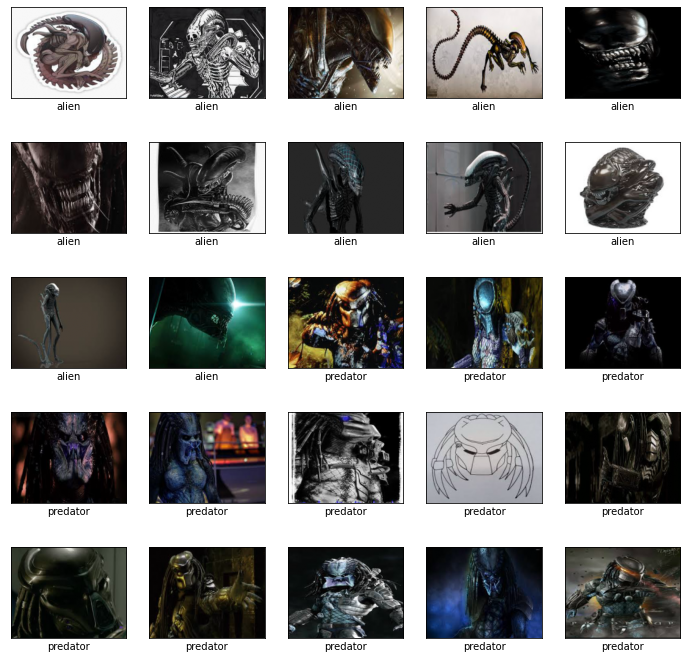

In [8]:
plt.figure(figsize=(12,12))
for x, i in enumerate(range(335,360)):
    plt.subplot(5,5,x+1) #espacio del subplot
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap="binary_r")
    plt.xlabel(clases[y_train[i]])
plt.show()

You can see that the resizing is correct and does not distort the images, and that they are in colour so we maximise the information of the model.

**NEURAL NETWORK MODEL**

The depth of the model is **9 layers**. Most of these layers have a width of **32 units**, with the widest being 128.

The images are introduced to the model in colour format so they have a **depth of 3**, using the red, green and blue colour channels.

In [9]:
model = keras.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(150, 190, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(150, 190, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 186, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 93, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 89, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 44, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 40, 32)        25632     
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 20, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9600)              0

The **Adam Optimizer** was chosen because it is a **popular algorithm** in the field of deep learning and achieves good results quickly.

https://en.wikipedia.org/w/index.php?search=Adam%20(optimization%20algorithm)&title=Special%3ASearch&wprov=acrw1_0

In [10]:
# Choose hyperparameters 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Train on 694 samples
Epoch 1/10
694/694 [==============================] - 25s 36ms/sample - loss: 0.7111 - accuracy: 0.5216
Epoch 2/10
694/694 [==============================] - 30s 44ms/sample - loss: 0.6369 - accuracy: 0.6369
Epoch 3/10
694/694 [==============================] - 25s 36ms/sample - loss: 0.5944 - accuracy: 0.6916
Epoch 4/10
694/694 [==============================] - 26s 38ms/sample - loss: 0.5561 - accuracy: 0.7205
Epoch 5/10
694/694 [==============================] - 23s 32ms/sample - loss: 0.5317 - accuracy: 0.7262
Epoch 6/10
694/694 [==============================] - 22s 32ms/sample - loss: 0.5338 - accuracy: 0.7349
Epoch 7/10
694/694 [==============================] - 23s 33ms/sample - loss: 0.4678 - accuracy: 0.7666
Epoch 8/10
694/694 [==============================] - 22s 32ms/sample - loss: 0.4025 - accuracy: 0.8112
Epoch 9/10
694/694 [==============================] - 24s 34ms/sample - loss: 0.3676 - accuracy: 0.8357
Epoch 10/10
694/694 [======================

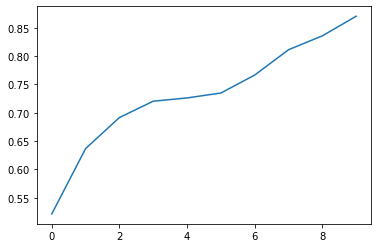

In [12]:
plt.plot(history.history["accuracy"])
plt.show()

It can be seen that the more the epochs increase, the greater the accuracy. After several tests it is determined to make **10 epochs**.

**EVALUATE**

We evaluate the model with the test data.

In [13]:
test_loss, test_acc = model.evaluate(X_test,  y_test)

print('\nTest accuracy:', test_acc)

200/200 [==============================] - 2s 9ms/sample - loss: 0.6441 - accuracy: 0.7350

Test accuracy: 0.735


The model reaches an **accuracy of 73.5%**. 

**Confusion Matrix**

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

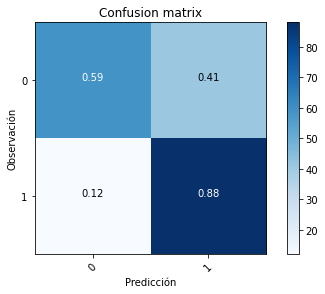

In [15]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true =test_labels
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(len(clases)))

In the confusion matrix we can see the accuracy of the **true negatives of 59%**. The **true positives are 88%** accurate. The **false negatives and positives** reach **12% and 41%** respectively.

**PREDICTION**

In [16]:
def plot_image(i, predictions_array, true_label, img):
    """Gets the image plot with the predictions and the real label
    
    Parameters:
    -----------
    i: int
        contains the index number of the image list
        
    predictions_array : array
        contains the list of predictions in array format
        
    true_label: array
        contains the true labels of the test data set
        
    img: array
        contains the test data set without labels
        
    """
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(clases[predicted_label],
                                100*np.max(predictions_array),
                                clases[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    """Gets plot with the predictions, blue if is true and red if the prediction is wrong
    
    Parameters:
    -----------
    i: int
        contains the index number of the image list
        
    predictions_array : array
        contains the list of predictions in array format
        
    true_label: array
        contains the true labels of the test data set
        
    """
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(len(clases)))
    plt.yticks([])
    thisplot = plt.bar(range(len(clases)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

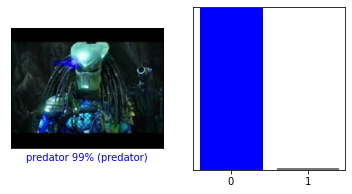

In [17]:
i = 160
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, Y_pred[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, Y_pred[i],  y_test)
plt.show()

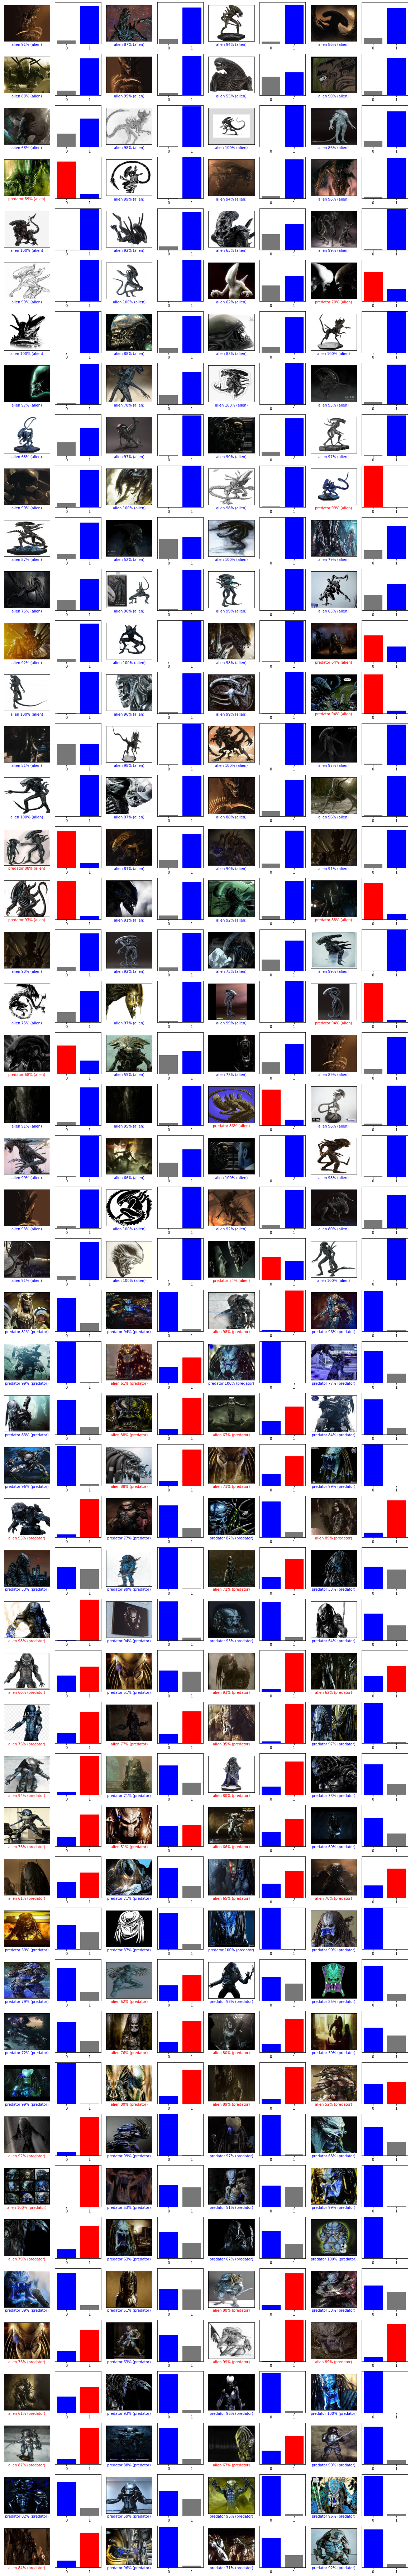

In [18]:
num_rows = 50
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, Y_pred[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, Y_pred[i], y_test)
plt.tight_layout()
plt.show()

We can see the **blue** predictions when they are **right** and **red** when they are **wrong**.

**CONCLUSIONS**

As a conclusion, the **accuracy of the model in training** reaches **87%**, so it is concluded that the model is learning.

The **accuracy for the test** set reaches **73.5%** being an acceptable result.

To improve the results it would be necessary to **analyze the false positives and negatives**, and to extend the training data to enrich the learning.